In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BNB2019-2024.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\KIM ANH\anaconda3\envs\lab1\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0813
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0087
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0048
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0045
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0040
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0038
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0030
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0033
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0034
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0035
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0030
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0028
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0032
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0031
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99m

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [12]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 270.58484986714166


In [13]:
# Tính MAPE
test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

Testing MAPE: 69372.3514150958


In [14]:
# Tính MSE
test_mse = np.mean((y_pred - ytest) ** 2)
print('Testing MSE:', test_mse)

Testing MSE: 73216.1609776236


In [15]:
# 13. Dự báo 30 ngày tiếp theo
from numpy import array

x_input = test_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 100):
        # Lấy đúng 100 phần tử cuối cùng
        x_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        # Dự đoán giá trị tiếp theo
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        # Thêm giá trị dự đoán vào danh sách
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1



0 day input [0.36274506 0.36325421 0.35757867 0.34811602 0.3495097  0.36675674
 0.35025292 0.35323429 0.35354256 0.35599945 0.36657625 0.3258307
 0.340314   0.33675585 0.33545785 0.33776761 0.3341765  0.32723409
 0.3306432  0.32711594 0.3276278  0.32892126 0.33005469 0.32824974
 0.3360497  0.33299709 0.33024014 0.33557263 0.34448539 0.34276336
 0.34571182 0.35574894 0.36786681 0.36475761 0.36643537 0.35346403
 0.35264237 0.34507417 0.34813608 0.36507858 0.37629004 0.39300811
 0.39320309 0.3932248  0.38320847 0.38674482 0.43270004 0.47169776
 0.47158018 0.45699175 0.46192565 0.45482597 0.4577865  0.45432788
 0.46116786 0.4715817  0.46235201 0.44786031 0.4405003  0.44291643
 0.43762707 0.44381158 0.44922158 0.431105   0.43950489 0.43473831
 0.46252757 0.45901412 0.44979772 0.45611245 0.45762464 0.46161676
 0.46365535 0.44432213 0.43376663 0.42579351 0.42403432 0.43964101
 0.44490418 0.44362965 0.452233   0.4473624  0.436689   0.4364261
 0.43789551 0.43576697 0.44326727 0.43744386 0.44022

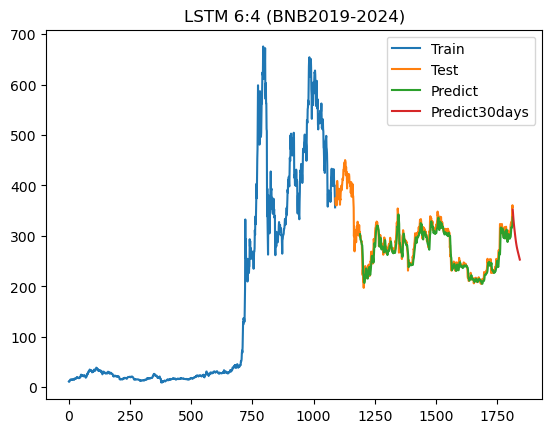

In [16]:
# 14.Vẽ hình
plt.title('LSTM 6:4 (BNB2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [17]:
from numpy import array

y_input = test_data[60:].reshape(1, -1)
y_input.shape

temp_input = list(y_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 100):
        # Lấy đúng 100 phần tử cuối cùng
        y_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, y_input))
        y_input = y_input.reshape((1, n_steps, 1))
        # Dự đoán giá trị tiếp theo
        yhat = model.predict(y_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        # Thêm giá trị dự đoán vào danh sách
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        y_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(y_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.36274506 0.36325421 0.35757867 0.34811602 0.3495097  0.36675674
 0.35025292 0.35323429 0.35354256 0.35599945 0.36657625 0.3258307
 0.340314   0.33675585 0.33545785 0.33776761 0.3341765  0.32723409
 0.3306432  0.32711594 0.3276278  0.32892126 0.33005469 0.32824974
 0.3360497  0.33299709 0.33024014 0.33557263 0.34448539 0.34276336
 0.34571182 0.35574894 0.36786681 0.36475761 0.36643537 0.35346403
 0.35264237 0.34507417 0.34813608 0.36507858 0.37629004 0.39300811
 0.39320309 0.3932248  0.38320847 0.38674482 0.43270004 0.47169776
 0.47158018 0.45699175 0.46192565 0.45482597 0.4577865  0.45432788
 0.46116786 0.4715817  0.46235201 0.44786031 0.4405003  0.44291643
 0.43762707 0.44381158 0.44922158 0.431105   0.43950489 0.43473831
 0.46252757 0.45901412 0.44979772 0.45611245 0.45762464 0.46161676
 0.46365535 0.44432213 0.43376663 0.42579351 0.42403432 0.43964101
 0.44490418 0.44362965 0.452233   0.4473624  0.436689   0.4364261
 0.43789551 0.43576697 0.44326727 0.43744386 0.44022

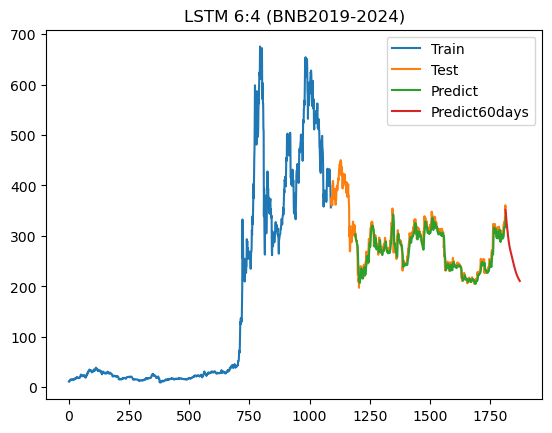

In [18]:
# 14.Vẽ hình
plt.title('LSTM 6:4 (BNB2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [19]:
from numpy import array

z_input = test_data[60:].reshape(1, -1)
z_input.shape

temp_input = list(z_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        # Lấy đúng 100 phần tử cuối cùng
        z_input = np.array(temp_input[-100:])
        print("{} day input {}".format(i, z_input))
        z_input = z_input.reshape((1, n_steps, 1))
        # Dự đoán giá trị tiếp theo
        yhat = model.predict(z_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        # Thêm giá trị dự đoán vào danh sách
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        z_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(z_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.36274506 0.36325421 0.35757867 0.34811602 0.3495097  0.36675674
 0.35025292 0.35323429 0.35354256 0.35599945 0.36657625 0.3258307
 0.340314   0.33675585 0.33545785 0.33776761 0.3341765  0.32723409
 0.3306432  0.32711594 0.3276278  0.32892126 0.33005469 0.32824974
 0.3360497  0.33299709 0.33024014 0.33557263 0.34448539 0.34276336
 0.34571182 0.35574894 0.36786681 0.36475761 0.36643537 0.35346403
 0.35264237 0.34507417 0.34813608 0.36507858 0.37629004 0.39300811
 0.39320309 0.3932248  0.38320847 0.38674482 0.43270004 0.47169776
 0.47158018 0.45699175 0.46192565 0.45482597 0.4577865  0.45432788
 0.46116786 0.4715817  0.46235201 0.44786031 0.4405003  0.44291643
 0.43762707 0.44381158 0.44922158 0.431105   0.43950489 0.43473831
 0.46252757 0.45901412 0.44979772 0.45611245 0.45762464 0.46161676
 0.46365535 0.44432213 0.43376663 0.42579351 0.42403432 0.43964101
 0.44490418 0.44362965 0.452233   0.4473624  0.436689   0.4364261
 0.43789551 0.43576697 0.44326727 0.43744386 0.44022

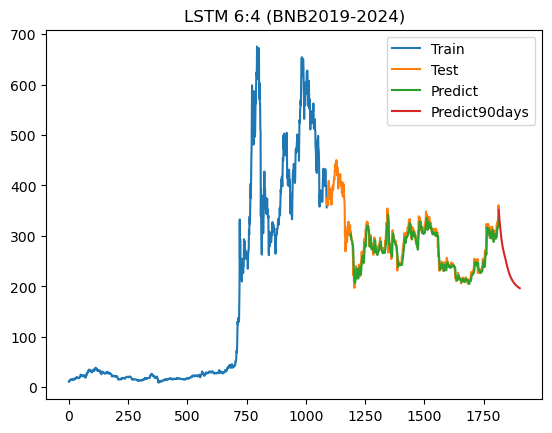

In [20]:
plt.title('LSTM 6:4 (BNB2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect90days_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect90days_data_index,scaler.inverse_transform(lst_output))  # Vẽ dự đoán cho 90 ngày
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()


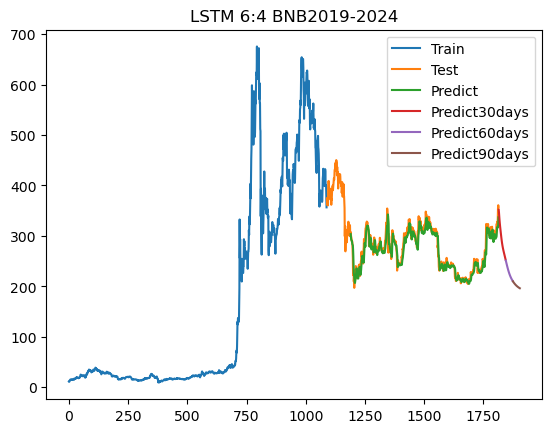

In [21]:
plt.title('LSTM 6:4 BNB2019-2024')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred),label='Predict')
prediect30days_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(prediect30days_data_index, scaler.inverse_transform(np.array(lst_output[:30]).reshape(-1, 1)), label='Predict30days')
prediect60days_data_index = pd.RangeIndex(start=train_size+test_size+30, stop=train_size+test_size+60, step=1)
plt.plot(prediect60days_data_index, scaler.inverse_transform(np.array(lst_output[30:60]).reshape(-1, 1)), label='Predict60days')
prediect90days_data_index = pd.RangeIndex(start=train_size+test_size+60, stop=train_size+test_size+90, step=1)
plt.plot(prediect90days_data_index, scaler.inverse_transform(np.array(lst_output[60:]).reshape(-1, 1)), label='Predict90days')
plt.legend()
plt.show()